In [1]:
!pip install -U kaleido

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/dataset2.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18361 entries, 0 to 18360
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Full Name                        18361 non-null  object
 1   Primary Job Title                18361 non-null  object
 2   Bio                              18361 non-null  object
 3   Gender                           18361 non-null  int64 
 4   Number of News Articles          18361 non-null  int64 
 5   Number of Founded Organizations  18361 non-null  int64 
 6   Number of Portfolio Companies    18361 non-null  int64 
 7   Number of Investments_x          18361 non-null  int64 
 8   Number of Partner Investments    18361 non-null  int64 
 9   Number of Lead Investments_x     18361 non-null  int64 
 10  Number of Exits_x                18361 non-null  int64 
 11  Number of Events_x               18361 non-null  int64 
 12  Categories                      

In [4]:
x = {'1':'male','0':'female','2':'other'}
df['Gender'] = df['Gender'].astype('str').map(x)

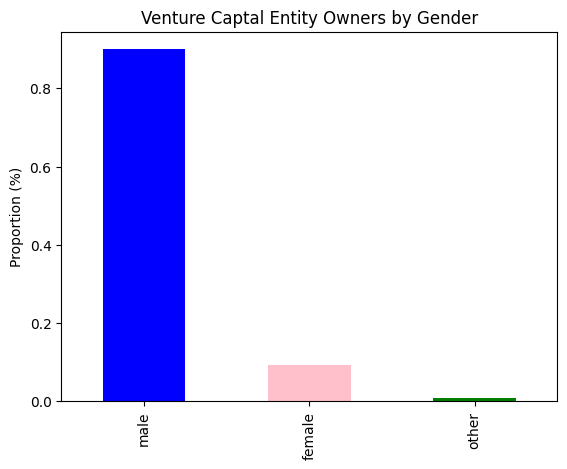

In [5]:
df['Gender'].value_counts(normalize=True).plot(kind='bar', color=['blue', 'pink', 'green'])
plt.ylabel('Proportion (%)')
plt.title('Venture Captal Entity Owners by Gender')
plt.savefig('OwnersGender.png')
plt.show()

In [6]:
df['Success'] = df['Success'].astype('str')

In [7]:
counts = df.groupby('Success')['Gender'].value_counts(normalize=True)
counts = counts.unstack(level=0)
counts

Success,0,1
Gender,,
female,0.110952,0.065217
male,0.881091,0.928930
other,0.007957,0.005853


In [8]:
fig = px.bar(
    counts,
    y=counts.columns,
    barmode='group',
    title='Gender Distribution Vs Success'
)

fig.update_layout(xaxis_title='Gender', yaxis_title='Distribution (%)')
fig.write_image('GenderSuccess.png')
fig.show()